<a href="https://colab.research.google.com/github/WoogiWooks/DLCV_New/blob/main/8_Ultralytics_YOLO_%EC%8B%A4%EC%8A%B5_Format_%EC%84%A4%EC%A0%95_%EB%B0%8F_Train_%ED%9B%84_Eval%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ultralytics YOLO 다운로드 및 스펙체크**

In [ ]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 9964, done.
remote: Total 9964 (delta 0), reused 0 (delta 0), pack-reused 9964
Receiving objects: 100% (9964/9964), 9.31 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (6720/6720), done.


In [ ]:
!cd yolov3;pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 8.0 MB/s 
     |████████████████████████████████| 1.7 MB 17.0 MB/s 
     |████████████████████████████████| 181 kB 35.8 MB/s 
     |████████████████████████████████| 144 kB 42.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 


In [ ]:
from IPython.display import Image, clear_output  # to display images
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.0+cu111 (Tesla K80)


In [ ]:
!nvidia-smi

Wed Feb 23 13:50:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    31W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Ultralytics YOLO 통한 Inference**
* Backbone은 YOLO v3 이지만 상위 버전의 여러가지 성능향상 요소가 더해짐

## **Image Detection**
* coco pretrained 모델 사용

In [ ]:
## --project로 저장경로를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨 (2번째 수행하면 exp2 디렉토리가 생성됨)
## coco로 pretrained된 yolov3.pt weight가 없으면 자동으로 download함
# --source data/images 를 통해 data/images 경로 내에 있는 모든 이미지를 모두 Detect
# --conf 는 confidence threshold
# --iou 는 NMS를 위한 IoU Threshold => 해당 Threshold 이상인 Box들은 제거 (높게 잡을수록 Box들 제거가 잘 안이루어짐) 

!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.1 --iou 0.99 --source data/images

detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.99, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 45 persons, 17 bicycles, 14 buss, 11 ties, Done. (0.136s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 25 persons, 30 ties, Done. (0.110s)
Speed: 0.4ms pre-process, 123.1ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


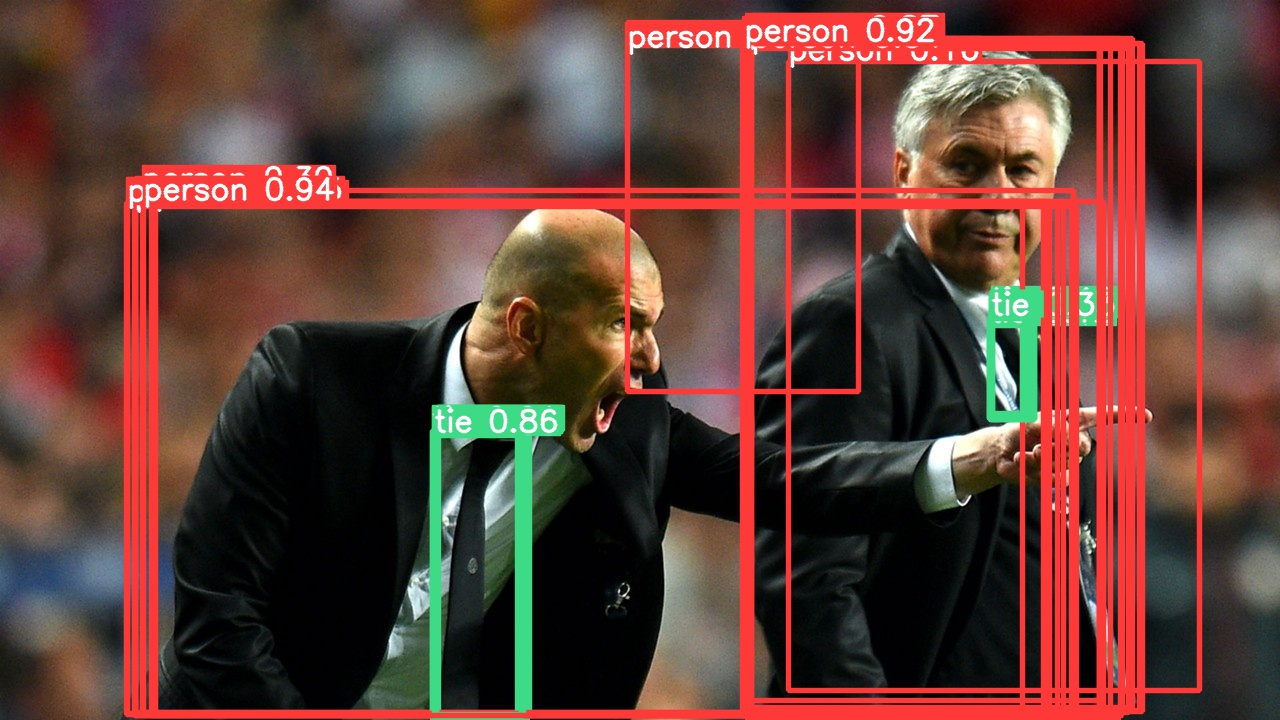

In [ ]:
from IPython.display import Image, clear_output 

Image(filename='yolov3/runs/detect/exp5/zidane.jpg', width=600)

In [ ]:
# 다른 이미지 Detection

!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-02-22 11:45:51--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.005s  

2022-02-22 11:45:51 (79.9 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



In [ ]:
# 셋업 바꿔보기
# 저장 경로 바꿔주기
# --name 은 저장할 폴더 이름
# --exist-ok 는 재수행시 결과를 새폴더를 만들어 저장하지 않고 같은 폴더에 저장함
# --exist-ok 없으면 실행할때 마다 폴더1, 폴더2 .... 계속 생김

!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/beatles01.jpg  \
                            --project /content/data  --name=run_image --exist-ok  --line-thickness 3

detect: weights=['yolov3.pt'], source=/content/data/beatles01.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
image 1/1 /content/data/beatles01.jpg: 512x640 5 persons, 11 cars, 1 truck, 1 handbag, Done. (0.072s)
Speed: 0.5ms pre-process, 72.0ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


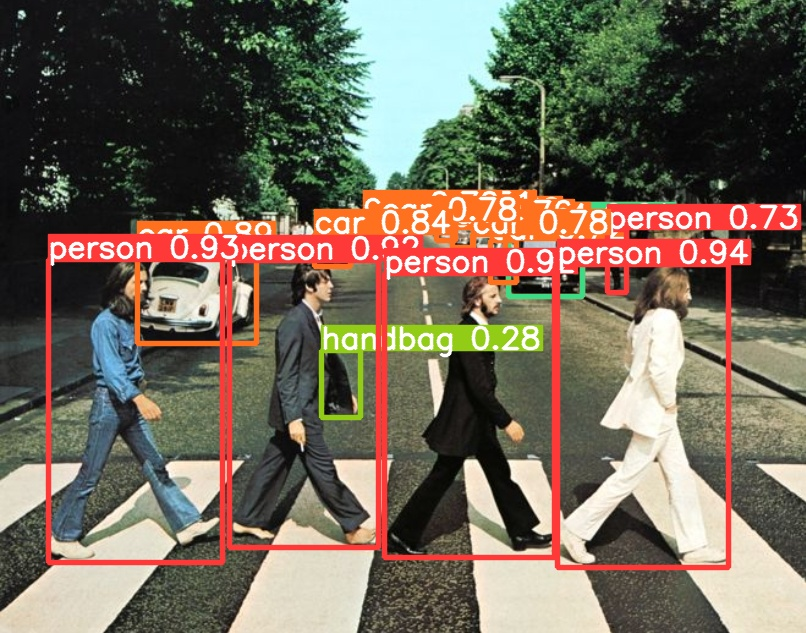

In [ ]:
Image(filename='/content/data/run_image/beatles01.jpg', width=600)

## **Video Detection**


In [ ]:
# 영상 다운로드 하기
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2022-02-22 11:53:25--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2022-02-22 11:53:25--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2022-02-22 11:53:25--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [ ]:
# --project를 /content/data/run_video 로 설정하여 Detect된 영상을 저장
  
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/data/Night_Day_Chase.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/run_video, name=exp, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
video 1/1 (1/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (0.064s)
video 1/1 (2/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (0.040s)
video 1/1 (3/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (0.040s)
video 1/1 (4/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Don

# **COCO128 데이터를 통한 Train 진행**


### **Ultralytics YOLO의 데이터셋 및 annotation 포맷 이해**

* 데이터셋.yaml 파일에 설정되어 있는 경로(/content/datasets/coco128/images/train2017) 에 데이터 다운로드됨
  * 데이터셋.yaml 파일에 설정되어 있는 경로에서 images가 자동으로 labels로 바뀌며 annotation 파일 자동 다운로드 됨
  * 또한 학습시 yaml에서 annotation 파일은 자동으로 labels 폴더를 찾아서 수행함
  *따라서 annotation 파일이 있는 디렉토리 이름을 labels 로 맞춰줘야 함
* Ultralytics Format은 VOC와 유사한 1 이미지 1 annotation
* Ultralytics YOLO annotation의 포맷은 5개 값으로 이루어짐
  * Class ID, 중심 x,y 좌표, width, height 5개 값
  * 각 위치 값은 0~1 사이 값으로 정규화
  * 기본적인 YOLO의 구조와 같음

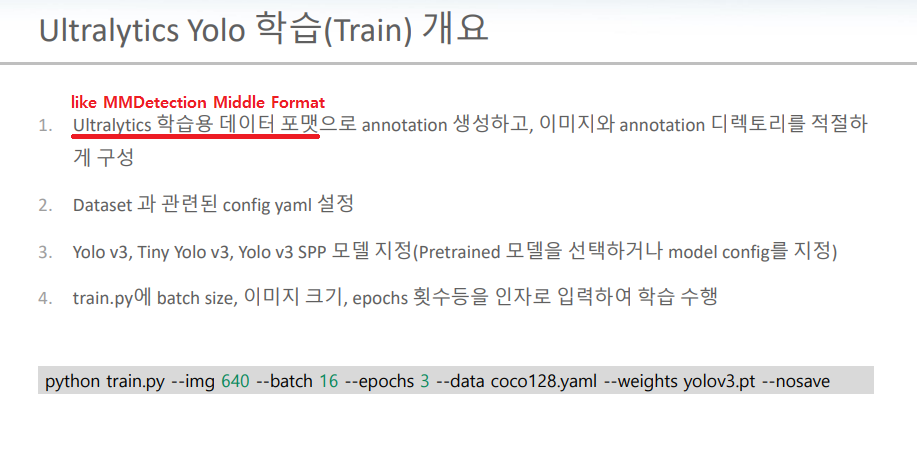

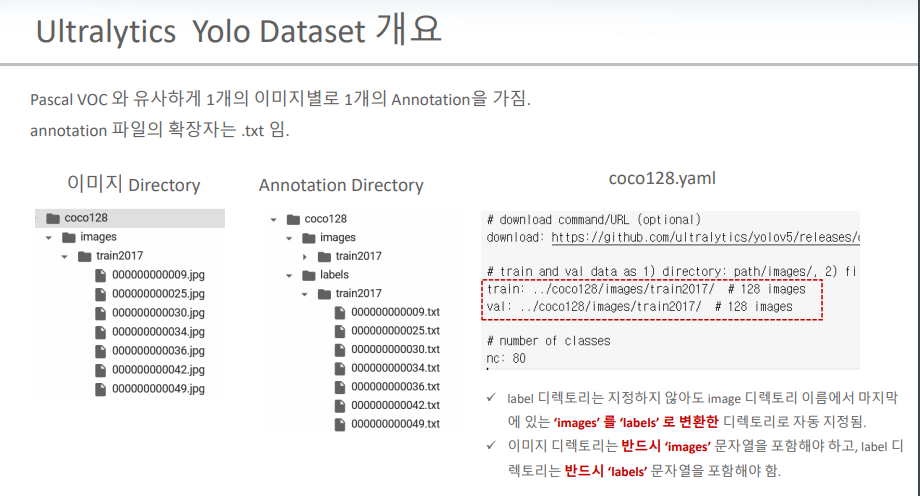

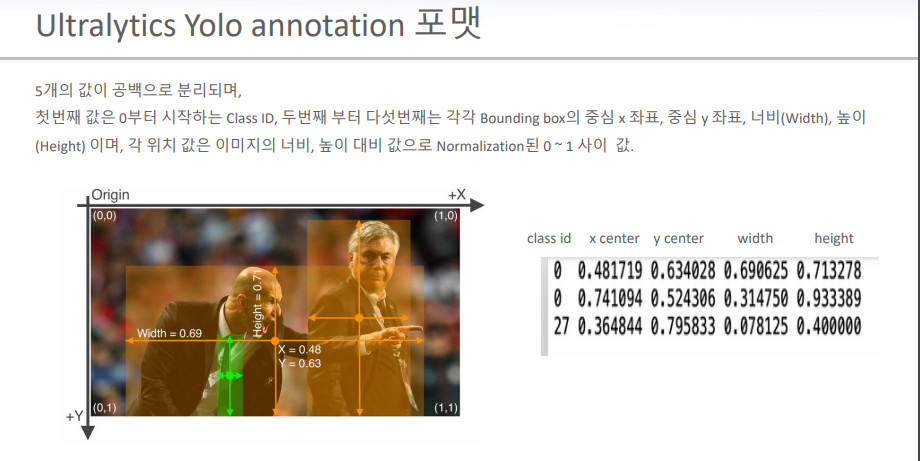

In [ ]:
# MMDetection의 Config와 비슷
# train.py 에서 학습을 위한 Config를 설정
# data 경로에 있는 coco128.yaml 을 학습에 사용
# --nosave는 체크포인트별로 weight 저장하지말고 last weight만 저장
# --cache는 한번 읽은 이미지를 캐싱화하여 다음번에 사용할때 더 빠르게 가져옴
# train.py 파일을 들어가보면 설정인자들에 대한 설명 확인 가능

%cd yolov3
!python train.py --img 320 --batch 8 --epochs 3 --data coco128.yaml --weights yolov3.pt --nosave --cache

""" yolov3/runs/train 에 학습 weight 및 학습결과에 대한 시각화 파일들이 존재함 """

/content/yolov3
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose 'Don't visualize my results'
train: weights=yolov3.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=3, batch_size=8, imgsz=320, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3

' yolov3/runs/train 에 학습 weight 및 학습결과에 대한 시각화 파일들이 존재함 '

In [ ]:
# labels 경로가 맞지 않는 경우

!mv /content/datasets/coco128/labels /content/datasets/coco128/labels_chg   # annotation 파일이 있는 경로 중 "labels" 를 다르게 수정
!python train.py --img 320 --batch 8 --epochs 3 --data coco128.yaml --weights yolov3.pt --nosave --

# yaml 파일이 수정된 경로를 못찾기 때문에 오류가 발생함
# 따라서 디렉토리 이름을 꼭 labels 로 맞춰줘야 함!!

mv: cannot stat '/content/datasets/coco128/labels': No such file or directory
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--evolve [EVOLVE]] [--bucket BUCKET]
                [--cache [CACHE]] [--image-weights] [--device DEVICE]
                [--multi-scale] [--single-cls] [--adam] [--sync-bn]
                [--workers WORKERS] [--project PROJECT] [--name NAME]
                [--exist-ok] [--quad] [--linear-lr]
                [--label-smoothing LABEL_SMOOTHING] [--patience PATIENCE]
                [--freeze FREEZE] [--save-period SAVE_PERIOD]
                [--local_rank LOCAL_

### **Dataset Config와 Weight 파일의 상대 경로, 절대 경로**
* train.py의 data option값으로 Dataset config yaml 파일을 지정할 수 있음
  * 파일명만 입력할 경우는 yolov3/data 디렉토리 아래에서 해당 파일을 찾음
  * 절대 경로로 입력할 경우 해당 경로에서 찾음, 없어도 자동다운 X

* weights option의 경우 파일명만 입력할 경우 yolov3 디렉토리에서 해당 파일을 찾음
  * 해당 파일이 없을 경우 자동으로 해당 파일을 https://github.com/ultralytics/yolov3/releases 에서 Download 함
* 절대 경로를 입력한 경우 해당 경로에서 파일을 찾되 파일이 없으면 해당 경로로 자동 Download함
* weights 파일은 yolov3.pt, yolov3-tiny.pt, yolov3-spp.pt 3가지가 있음
  * Pretrained 모델을 안쓰고 Random weight를 쓸수도 있지만 권장하지는 않음

In [ ]:
%cd /content
# !cd yolov3; python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov3.pt --nosave --cache
# !cd yolov3; python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights '' --cfg yolov3.yaml --nosave --cache
# !cd yolov3; python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov3-tiny.pt --nosave --cache
# !cd yolov3;python train.py --img 640 --batch 16 --epochs 3 --data /content/coco128/coco128.yaml --weights /content/coco128/yolov3-tiny.pt --nosave --cache
# !cd yolov3;python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov3-spp.pt --nosave --cache

### **COCO128 디렉토리 변경 후 학습 수행**

In [ ]:
%cd /content
!rm -rf /content/datasets

/content


In [ ]:
# 직접 coco128 데이터 세트를 다운로드

!wget -O /content/data/coco128.zip https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip
!cd /content/data; unzip coco128.zip 

In [ ]:
# 경로가 바뀌었기에 yaml 파일도 수정해주어야 함
# colab 상에서 수정이 어려워 깃허브에서 가져옴

!wget -O /content/data/coco128/coco128_renew.yaml https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/coco128_renew.yaml
!cat /content/data/coco128/coco128_renew.yaml

""" 수정된 yaml 파일의 train, val 경로가 바뀜 """

--2022-02-22 14:09:33--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/coco128_renew.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1594 (1.6K) [text/plain]
Saving to: ‘/content/data/coco128/coco128_renew.yaml’

/content/data/coco1 100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-02-22 14:09:33 (29.6 MB/s) - ‘/content/data/coco128/coco128_renew.yaml’ saved [1594/1594]

# COCO 2017 dataset http://cocodataset.org - first 128 training images
# Train command: python train.py --data coco128.yaml
# Default dataset location is next to YOLOv3:
#   /parent_folder
#     /coco128
#     /yolov3


# download command/URL (optional)
#download: https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip

# train and va

In [ ]:
# yolov3/data 에 새로 수정된 파일이 없음
# 따라서 절대경로로 수정된 yaml 파일이 있는 디렉토리를 data option 값으로 설정해줌

!cd /content/yolov3; python train.py --img 640 --batch 16 --epochs 3 --data /content/data/coco128/coco128_renew.yaml --weights yolov3.pt --nosave --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov3.pt, cfg=, data=/content/data/coco128/coco128_renew.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_

# **Custom 데이터를 통한 Train 진행**
* 디렉토리 포맷이 맞아야 함 => images & labels
* Ultralytics Format에 맞게 변환 (클래스 id와 0~1 정규화된 좌표)
* Dataset config.yaml 생성

In [ ]:
# Oxford Pet Dataset 다운로드
# 하나의 이미지에 하나의 annotation like VOC
# 이미지 내에 하나의 Object
# 메타데이터 존재

!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

!mkdir /content/data
!tar -xvf images.tar.gz -C /content/data
!tar -xvf annotations.tar.gz -C /content/data

## **디렉토리 포맷 맞추기 (images & labels)**

In [ ]:
# images와 labels 디렉토리를 train, val 용으로 생성

!mkdir /content/ox_pet;
!cd /content/ox_pet; mkdir images; mkdir labels;
!cd /content/ox_pet/images; mkdir train; mkdir val
!cd /content/ox_pet/labels; mkdir train; mkdir val

In [ ]:
# 디렉토리에 train, val을 위한 파일 넣어주는 과정
# 데이터프레임 활용한 train과 val 나누기

import pandas as pd 

pd.read_csv('/content/data/annotations/trainval.txt', sep=' ', header=None, names=['img_name', 'class_id', 'etc1', 'etc2'])

,img_name,class_id,etc1,etc2
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
3675,yorkshire_terrier_187,37,2,25
3676,yorkshire_terrier_188,37,2,25
3677,yorkshire_terrier_189,37,2,25
3678,yorkshire_terrier_18,37,2,25


In [ ]:
# 데이터프레임 활용 함수
# class_name 컬럼 생성
# img_filepath 컬럼 생성
# anno_filepath 컬럼 생성

import os
import pandas as pd
from sklearn.model_selection import train_test_split

# 전체 image/annotation 파일명을 가지는 리스트 파일명을 입력 받아 메타 파일용 DataFrame 및 학습/검증용 DataFrame 생성. 
def make_train_valid_df(list_filepath, img_dir, anno_dir, test_size=0.1):
  pet_df = pd.read_csv(list_filepath, sep=' ', header=None, names=['img_name', 'class_id', 'etc1', 'etc2'])
  #class_name은 image 파일명에서 맨 마지막 '_' 문자열 앞까지에 해당. 
  pet_df['class_name'] = pet_df['img_name'].apply(lambda x:x[:x.rfind('_')])
  
  # image 파일명과 annotation 파일명의 절대경로 컬럼 추가
  pet_df['img_filepath'] = img_dir + pet_df['img_name']+'.jpg'
  pet_df['anno_filepath'] = anno_dir + pet_df['img_name']+'.xml'
  # annotation xml 파일이 없는데, trainval.txt에는 리스트가 있는 경우가 있음. 이들의 경우 pet_df에서 해당 rows를 삭제함. 
  pet_df = remove_no_annos(pet_df)

  # 전체 데이터의 10%를 검증 데이터로, 나머지는 학습 데이터로 분리. 
  train_df, val_df = train_test_split(pet_df, test_size=test_size, stratify=pet_df['class_id'], random_state=2021)
  return pet_df, train_df, val_df

##### annotation xml 파일이 없는데, trainval.txt에는 리스트가 있는 경우에 이들을 dataframe에서 삭제하기 위한 함수.
def remove_no_annos(df):
  remove_rows = []
  for index, row in df.iterrows():
    anno_filepath = row['anno_filepath']
    if not os.path.exists(anno_filepath):
      print('##### index:', index, anno_filepath, '가 존재하지 않아서 Dataframe에서 삭제함')
      #해당 DataFrame index를 remove_rows list에 담음. 
      remove_rows.append(index)
  # DataFrame의 index가 담긴 list를 drop()인자로 입력하여 해당 rows를 삭제
  df = df.drop(remove_rows, axis=0, inplace=False)
  return df


pet_df, train_df, val_df = make_train_valid_df('/content/data/annotations/trainval.txt', 
                                               '/content/data/images/', '/content/data/annotations/xmls/', test_size=0.1)

##### index: 4 /content/data/annotations/xmls/Abyssinian_104.xml 가 존재하지 않아서 Dataframe에서 삭제함
##### index: 262 /content/data/annotations/xmls/Bengal_111.xml 가 존재하지 않아서 Dataframe에서 삭제함
##### index: 1456 /content/data/annotations/xmls/samoyed_10.xml 가 존재하지 않아서 Dataframe에서 삭제함
##### index: 2128 /content/data/annotations/xmls/Bengal_175.xml 가 존재하지 않아서 Dataframe에서 삭제함
##### index: 2395 /content/data/annotations/xmls/Egyptian_Mau_14.xml 가 존재하지 않아서 Dataframe에서 삭제함
##### index: 2402 /content/data/annotations/xmls/Egyptian_Mau_156.xml 가 존재하지 않아서 Dataframe에서 삭제함
##### index: 2427 /content/data/annotations/xmls/Egyptian_Mau_186.xml 가 존재하지 않아서 Dataframe에서 삭제함
##### index: 3177 /content/data/annotations/xmls/Ragdoll_199.xml 가 존재하지 않아서 Dataframe에서 삭제함
##### index: 3246 /content/data/annotations/xmls/saint_bernard_15.xml 가 존재하지 않아서 Dataframe에서 삭제함


In [ ]:
""" df.iterrows() """
""" 인덱스와 row별 column 이름과 값을 반환함 """

import pandas as pd 

a = pd.read_csv('/content/data/annotations/trainval.txt', sep=' ', header=None, names=['img_name', 'class_id', 'etc1', 'etc2'])
for index, row in a.iterrows():
  print(index, row)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2680 img_name    havanese_187
class_id              17
etc1                   2
etc2                  11
Name: 2680, dtype: object
2681 img_name    havanese_188
class_id              17
etc1                   2
etc2                  11
Name: 2681, dtype: object
2682 img_name    havanese_189
class_id              17
etc1                   2
etc2                  11
Name: 2682, dtype: object
2683 img_name    havanese_18
class_id             17
etc1                  2
etc2                 11
Name: 2683, dtype: object
2684 img_name    havanese_190
class_id              17
etc1                   2
etc2                  11
Name: 2684, dtype: object
2685 img_name    japanese_chin_146
class_id                   18
etc1                        2
etc2                       12
Name: 2685, dtype: object
2686 img_name    japanese_chin_147
class_id                   18
etc1                        2
etc2                       12
Name: 2686, dtype: object
2687 img_na

In [ ]:
pet_df.head()

,img_name,class_id,etc1,etc2,class_name,img_filepath,anno_filepath
0,Abyssinian_100,1,1,1,Abyssinian,/content/data/images/Abyssinian_100.jpg,/content/data/annotations/xmls/Abyssinian_100.xml
1,Abyssinian_101,1,1,1,Abyssinian,/content/data/images/Abyssinian_101.jpg,/content/data/annotations/xmls/Abyssinian_101.xml
2,Abyssinian_102,1,1,1,Abyssinian,/content/data/images/Abyssinian_102.jpg,/content/data/annotations/xmls/Abyssinian_102.xml
3,Abyssinian_103,1,1,1,Abyssinian,/content/data/images/Abyssinian_103.jpg,/content/data/annotations/xmls/Abyssinian_103.xml
5,Abyssinian_105,1,1,1,Abyssinian,/content/data/images/Abyssinian_105.jpg,/content/data/annotations/xmls/Abyssinian_105.xml


## **xml 파일의 Annotation을 Ultralytics Format으로 변환**
* annotation용 xml 파일을 txt 파일로 변환
* 하나의 이미지에 하나의 txt 파일
* 확장자를 제외한 이미지의 파일명과 annotation 파일명이 서로 동일해야 
* 하나의 xml annotation 파일을 Yolo 포맷용 txt 파일로 변환하는 함수 생성
* voc annotation의 좌상단(Top left: x1, y1), 우하단(Bottom right: x2, y2) 좌표를 Bounding Box 중심 좌표(Center_x, Center_y)와 너비(width), 높이(height)로 변경
* 중심 좌표와 너비, 높이는 원본 이미지 레벨로 0~1사이값으로 scale 되어야 
* class_id는 여러개의 label들을 0 부터 순차적으로 1씩 증가시켜 id 부여

In [ ]:
# Class 명을 부여. Class id는 자동적으로 CLASS_NAMES 개별 원소들을 순차적으로 0부터 36까지 부여
# 따라서 id 따로 만들 필요 없음

CLASS_NAMES = pet_df['class_name'].unique().tolist()
print(CLASS_NAMES)
print(CLASS_NAMES.index('american_bulldog'))

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
1


In [ ]:
# 1개의 voc xml 파일을 Yolo 포맷용 txt 파일로 변경하는 함수 

import glob
import xml.etree.ElementTree as ET

def xml_to_txt(input_xml_file, output_txt_file, object_name):
  # ElementTree로 입력 XML파일 파싱. 
  tree = ET.parse(input_xml_file)
  root = tree.getroot()
  img_node = root.find('size')
  # img_node를 찾지 못하면 종료
  if img_node is None:
    return None
  # 원본 이미지의 너비와 높이 추출. 
  img_width = int(img_node.find('width').text)
  img_height = int(img_node.find('height').text)

  # xml 파일내에 있는 모든 object Element를 찾음. 
  value_str = None
  with open(output_txt_file, 'w') as output_fpointer:
    for obj in root.findall('object'):
        # bndbox를 찾아서 좌상단(xmin, ymin), 우하단(xmax, ymax) 좌표 추출. 
        xmlbox = obj.find('bndbox')
        x1 = int(xmlbox.find('xmin').text)
        y1 = int(xmlbox.find('ymin').text)
        x2 = int(xmlbox.find('xmax').text)
        y2 = int(xmlbox.find('ymax').text)
        # 만약 좌표중에 하나라도 0보다 작은 값이 있으면 종료. 
        if (x1 < 0) or (x2 < 0) or (y1 < 0) or (y2 < 0):
          break
        # object_name과 원본 좌표를 입력하여 Yolo 포맷으로 변환하는 convert_yolo_coord()함수 호출. 
        class_id, cx_norm, cy_norm, w_norm, h_norm = convert_yolo_coord(object_name, img_width, img_height, x1, y1, x2, y2)
        # 변환된 yolo 좌표를 object 별로 출력 text 파일에 write
        value_str = ('{0} {1} {2} {3} {4}').format(class_id, cx_norm, cy_norm, w_norm, h_norm)
        output_fpointer.write(value_str+'\n')
        # debugging용으로 아래 출력
        #print(object_name, value_str)

# object_name과 원본 좌표를 입력하여 Yolo 포맷으로 변환
def convert_yolo_coord(object_name, img_width, img_height, x1, y1, x2, y2):
  # class_id는 CLASS_NAMES 리스트에서 index 번호로 추출. 
  class_id = CLASS_NAMES.index(object_name)
  # 중심 좌표와 너비, 높이 계산. 
  center_x = (x1 + x2)/2
  center_y = (y1 + y2)/2
  width = x2 - x1
  height = y2 - y1
  # 원본 이미지 기준으로 중심 좌표와 너비 높이를 0-1 사이 값으로 scaling
  center_x_norm = center_x / img_width
  center_y_norm = center_y / img_height
  width_norm = width / img_width
  height_norm = height / img_height

  return class_id, round(center_x_norm, 7), round(center_y_norm, 7), round(width_norm, 7), round(height_norm, 7)

# xml_to_txt('/content/data/annotations/xmls/Abyssinian_1.xml', '/content/ox_pet/labels/train/Abyssinian_1.txt', 'Abyssinian')


In [ ]:
# 여러개의 voc xml 파일을 Yolo 포맷용 txt 파일로 변경하기
# 앞에서 데이터프레임을 통해 만든 train_df, val_df 사용
# annotation과 함께 image 도 images 디렉토리에 이동

import shutil   # copy를 위한 모듈

def make_yolo_anno_file(df, tgt_images_dir, tgt_labels_dir):
  for index, row in df.iterrows():
    src_image_path = row['img_filepath']
    src_label_path = row['anno_filepath']
    # 이미지 1개당 단 1개의 오브젝트만 존재하므로 class_name을 object_name으로 설정.  
    object_name = row['class_name']
    # yolo format으로 annotation할 txt 파일의 절대 경로명을 지정. 
    target_label_path = tgt_labels_dir + row['img_name']+'.txt'
    # image의 경우 target images 디렉토리로 단순 copy
    shutil.copy(src_image_path, tgt_images_dir)   # image 디렉토리에 annotation에 대응되는 image 파일 복사하여 이동
    # annotation의 경우 xml 파일을 target labels 디렉토리에 Ultralytics Yolo format으로 변환하여  만듬
    xml_to_txt(src_label_path, target_label_path, object_name)

# train용 images와 labels annotation 생성
make_yolo_anno_file(train_df, '/content/ox_pet/images/train/', '/content/ox_pet/labels/train/')

# val용 images와 labels annotation 생성 
make_yolo_anno_file(val_df, '/content/ox_pet/images/val/', '/content/ox_pet/labels/val/')

## **학습을 위한 yaml 파일 생성**
* 학습 과정에서 images 와 labels 를 찾아갈 수 있게 yaml 파일 설정 필요
* 코랩 환경에서는 yaml 파일 생성 어려움ㅠ

In [ ]:
# 코랩환경 고려하여 github에서 yaml 가져오기
# yaml 열어보면 train과 val을 위한 경로가 잘 설정되어 있음
# labels 는 디렉토리가 labels로 되어있으면 알아서 찾아줌

!wget -O /content/ox_pet/ox_pet.yaml https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/ox_pet.yaml

--2022-02-23 14:12:09--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/ox_pet.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 754 [text/plain]
Saving to: ‘/content/ox_pet/ox_pet.yaml’

/content/ox_pet/ox_ 100%[===================>]     754  --.-KB/s    in 0s      

2022-02-23 14:12:10 (29.2 MB/s) - ‘/content/ox_pet/ox_pet.yaml’ saved [754/754]



## **학습 및 학습된 모델 파일을 이용한 Inference**


### **Custom Dataset을 통한 학습**


In [ ]:
### epoch 20번 train시 1시간 정도 소모 됩니다. colab환경에서 아래를 browser의 console 에서 붙여 넣기가 필요할 수 있습니다. 
### shift+cntr+i 로 browser console 열기 
# https://github.com/chulminkw/DLCV/blob/master/data/util/colab_autoclick.js
'''
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
'''

In [ ]:
# 학습되는 weight를 구글 드라이브 폴더에 저장
# 10번 미만 epoch는 좋은 성능이 안나옴 
# 최소 30번 이상 epoch 적용
# --nosave 안주면 last weight 와 best weight 저장 (nosave 옵션 주면 last만 저장)

!cd /content/yolov3; python train.py --img 640 --batch 16 --epochs 2 --data /content/ox_pet/ox_pet.yaml --weights yolov3.pt --project=/content/drive/MyDrive/Colab\ Notebooks/DLCV/7.\ weight\ 저장 \
                                     --name pet --exist-ok 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose 'Don't visualize my results'
train: weights=yolov3.pt, cfg=, data=/content/ox_pet/ox_pet.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=2, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=/content/drive/MyDrive/Colab Notebooks/DLCV/7. weight 저장, name=pet, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, m

### **학습된 모델 파일 통한 Inference**
* detect.py 사용


In [ ]:
# Image inference 
!cd yolov3;python detect.py --source /content/data/images/pug_100.jpg --weights /content/drive/MyDrive/Colab\ Notebooks/DLCV/7.\ weight\ 저장/pet/weights/best.pt --conf 0.2 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/content/drive/MyDrive/Colab Notebooks/DLCV/7. weight 저장/pet/weights/best.pt'], source=/content/data/images/pug_100.jpg, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61691290 parameters, 0 gradients, 155.3 GFLOPs
image 1/1 /content/data/images/pug_100.jpg: 640x448 Done. (0.136s)
Speed: 0.5ms pre-process, 135.8ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


In [ ]:
# Video download
# Video Inference
# source의 확장자명이 mp4 이면 자동으로 Video Inference 수행
# NMS IoU Threshold 부여 (--iou), 설정된 겹치는 정도에 따라 Box 제거

!wget -O /content/data/ox_dog.mp4  https://github.com/chulminkw/DLCV/blob/master/data/video/ox_dog.mp4?raw=true

!cd yolov3; python detect.py --source /content/data/ox_dog.mp4 --weights /content/drive/MyDrive/Colab\ Notebooks/DLCV/7.\ weight\ 저장/pet/weights/best.pt \
                  --project /content/data/output --name run_video --exist-ok --line-thickness 3 --conf 0.4 --iou=0.6

### **Test 데이터에 대한 Evaluation 하기**
* test 데이터를 통한 모델 평가 진행
* val.py 사용
* test에 쓰일 images 와 labels 를 찾아갈 수 있게 yaml에 test 경로 설정이 되어야함
* 저장경로의 test result에 모델 성능에 대한 다양한 지표가 저장

In [ ]:
!cd yolov3; python val.py --weights /content/drive/MyDrive/Colab\ Notebooks/DLCV/7.\ weight\ 저장/pet/weights/best.pt  --data /content/ox_pet/ox_pet.yaml \
                           --project /content/data/output --name=test_result --exist-ok --img 640 --iou 0.65



val: data=/content/ox_pet/ox_pet.yaml, weights=['/content/drive/MyDrive/Colab Notebooks/DLCV/7. weight 저장/pet/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/data/output, name=test_result, exist_ok=True, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61691290 parameters, 0 gradients, 155.3 GFLOPs
val: Scanning '/content/ox_pet/labels/val.cache' images and labels... 368 found, 0 missing, 0 empty, 0 corrupted: 100% 368/368 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 12/12 [00:32<00:00,  2.67s/it]
                 all        368        368     0.0644      0.502      0.104     0.0655
          Abyssinian        368         10     0.0673        0.9